In [15]:
import mysql.connector
import pandas as pd
import numpy as np

from IPython.display import Image
from IPython.core.display import HTML 


In [2]:
passwd = '8706419235'

In [3]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd=f'{passwd}'
)

In [4]:
con

In [5]:
c = con.cursor(buffered=True)
query = 'SHOW databases'
c.execute(query)

In [6]:
c.fetchall()

[('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sys',),
 ('wo',),
 ('wor',),
 ('world',)]

In [7]:
query = 'USE world'
c.execute(query)

In [8]:
query = 'SHOW tables'
c.execute(query)
c.fetchall()

[('city',), ('country',), ('countrylanguage',)]

# Nomer 2

### Nomer 1.1

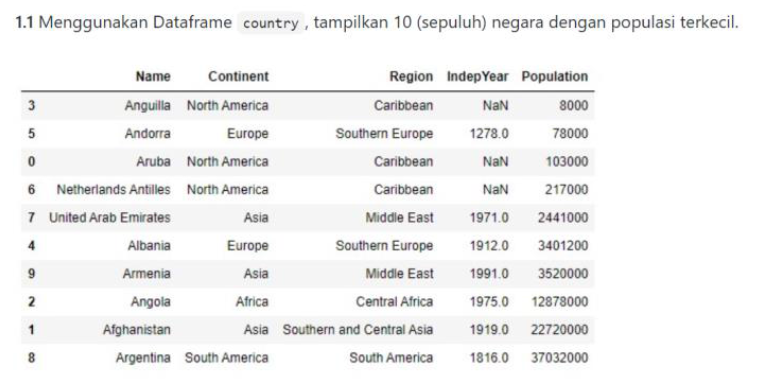

In [19]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "1.PNG", width=1000,unconfined=True)

In [13]:
# nomer 1.1

query = 'SELECT * FROM country'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# Make a  DataFrame
country_df = pd.DataFrame(res, columns = cols)

country_df_ = country_df[['Name', 'Continent', 'Region', 'IndepYear', 'Population']]

# delete data that has zero population value
country_df_.drop(country_df_.loc[country_df_['Population']==0].index, inplace=True)
ten_countries_with_small_population = country_df_.sort_values(by='Population')
ten_countries_with_small_population.head(10)



c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Continent,Region,IndepYear,Population
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000
209,Tokelau,Oceania,Polynesia,NaN,2000
71,Falkland Islands,South America,South America,NaN,2000
154,Norfolk Island,Oceania,Australia and New Zealand,NaN,2000
157,Niue,Oceania,Polynesia,NaN,2000
52,Christmas Island,Oceania,Australia and New Zealand,NaN,2500
189,Svalbard and Jan Mayen,Europe,Nordic Countries,NaN,3200
188,Saint Helena,Africa,Western Africa,NaN,6000


### Nomer 1.2

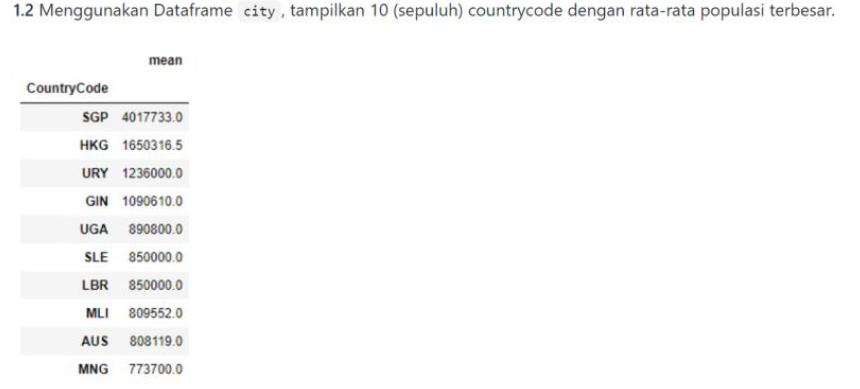

In [20]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "2.PNG", width=1000,unconfined=True)

In [14]:
# nomer 1.2

query = 'SELECT * FROM city'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# make a dataframe
city_df = pd.DataFrame(res, columns = cols)

city_df_population = city_df.groupby(['CountryCode']).mean()['Population'].to_frame()
city = city_df_population.sort_values(by='Population', ascending=False)
city.head(10)



,Population
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


# Nomer 1.3

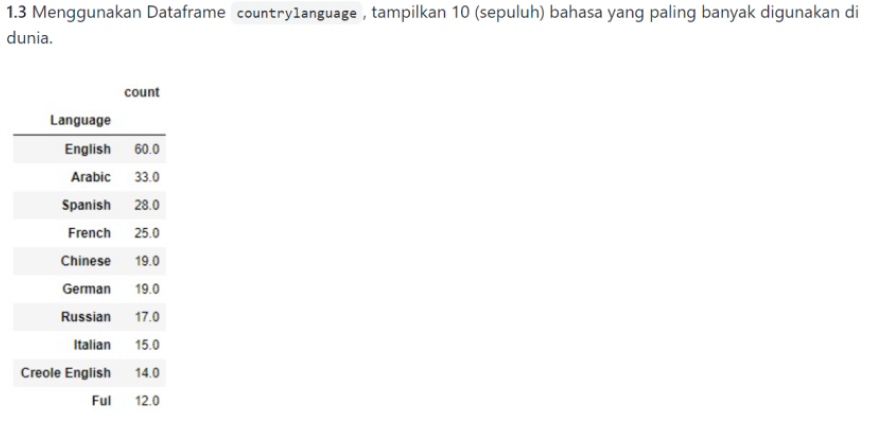

In [21]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "3.PNG", width=1000,unconfined=True)

In [65]:
# nomer 1.3

query = 'SELECT * FROM countrylanguage'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# make a dataframe
cl_df = pd.DataFrame(res, columns = cols)
# city_df_population = city_df.groupby(['CountryCode']).mean()['Population'].to_frame()
cl_df_ = cl_df.groupby(['Language']).count()
cl_df_1 = cl_df_[['CountryCode']]
cl_df_1.sort_values(by='CountryCode', ascending=False).head(10)

,CountryCode
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


# Nomer 2

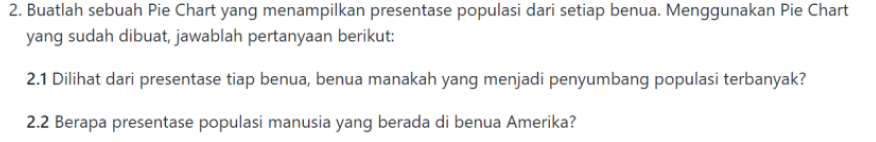

In [23]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "4.PNG", width=1000,unconfined=True)

In [66]:
country_df

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...,...
4074,4075,Khan Yunis,PSE,Khan Yunis,123175
4075,4076,Hebron,PSE,Hebron,119401
4076,4077,Jabaliya,PSE,North Gaza,113901
4077,4078,Nablus,PSE,Nablus,100231


In [74]:


query = 'SELECT * FROM country'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# bikin DF
country_df = pd.DataFrame(res, columns = cols)
country_df_pop = country_df.groupby(by='Continent').sum()
country_df_pop_1 = country_df_pop[['Population']]
country_df_pop_1 

,Population
Continent,
Africa,784475000
Antarctica,0
Asia,3705025700
Europe,730074600
North America,482993000
Oceania,30401150
South America,345780000


### Nomer 2.1

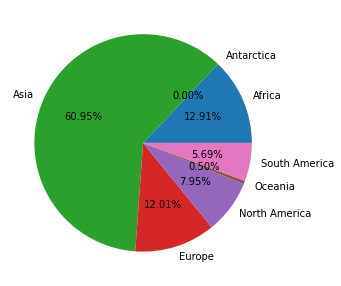

In [75]:
import matplotlib.pyplot as plt

continent_label = list(country_df_pop_1.index)
plt.figure(figsize=(10,5))
plt.pie(country_df_pop_1['Population'], labels=continent_label,
       autopct='%.2f%%')
plt.show()

Terlihat dari PieChart Benua 'ASIA' menjadi penyumbang populasi terbanyak.

### Nomer 2.2

In [80]:
# nomer 2.2 : 
print(f'Persentase Populasi manusia yang berada di benua Amerika adalah : {5.69 + 7.95}%')  

Persentase Populasi manusia yang berada di benua Amerika adalah : 13.64%


# Nomer 3

### Nomer 3.1 

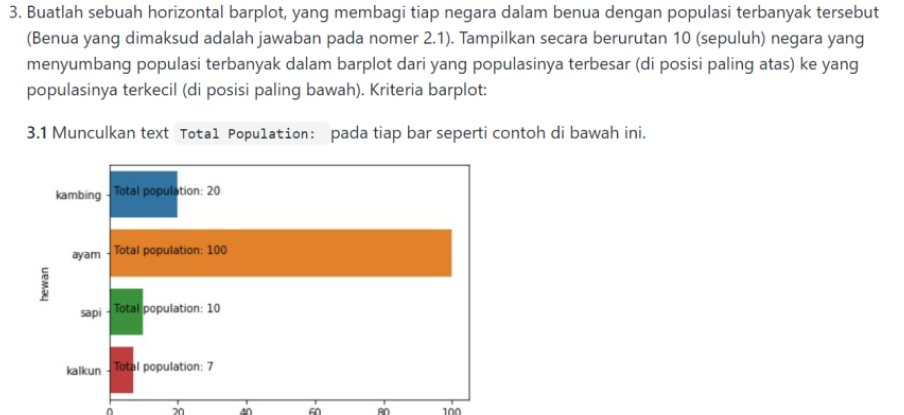

In [24]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "5.PNG", width=1000,unconfined=True)

In [81]:
# nomer 3
# nomer 3.1

df_country_asia = country_df[country_df['Continent']=='Asia']
df_country_asia_sort_population_10 = df_country_asia.sort_values(by=['Population'], ascending=False).head(10) 
display(df_country_asia_sort_population_10)

df_country_asia_sort_population_10.set_index('Name', inplace=True)
df_country_asia_sort_population_10

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
41,CHN,China,Asia,Eastern Asia,9572900.00,-1523.0,1277558000,71.4,982268.00,917719.00,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
99,IND,India,Asia,Southern and Central Asia,3287263.00,1947.0,1013662000,62.5,447114.00,430572.00,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
98,IDN,Indonesia,Asia,Southeast Asia,1904569.00,1945.0,212107000,68.0,84982.00,215002.00,Indonesia,Republic,Abdurrahman Wahid,939.0,ID
164,PAK,Pakistan,Asia,Southern and Central Asia,796095.00,1947.0,156483000,61.1,61289.00,58549.00,Pakistan,Republic,Mohammad Rafiq Tarar,2831.0,PK
21,BGD,Bangladesh,Asia,Southern and Central Asia,143998.00,1971.0,129155000,60.2,32852.00,31966.00,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
109,JPN,Japan,Asia,Eastern Asia,377829.00,-660.0,126714000,80.7,3787042.00,4192638.00,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
230,VNM,Vietnam,Asia,Southeast Asia,331689.00,1945.0,79832000,69.3,21929.00,22834.00,Viêt Nam,Socialistic Republic,Trân Duc Luong,3770.0,VN
168,PHL,Philippines,Asia,Southeast Asia,300000.00,1946.0,75967000,67.5,65107.00,82239.00,Pilipinas,Republic,Gloria Macapagal-Arroyo,766.0,PH
102,IRN,Iran,Asia,Southern and Central Asia,1648195.00,1906.0,67702000,69.7,195746.00,160151.00,Iran,Islamic Republic,Ali Mohammad Khatami-Ardakani,1380.0,IR
215,TUR,Turkey,Asia,Middle East,774815.00,1923.0,66591000,71.0,210721.00,189122.00,Türkiye,Republic,Ahmet Necdet Sezer,3358.0,TR


,Code,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Name,,,,,,,,,,,,,,
China,CHN,Asia,Eastern Asia,9572900.00,-1523.0,1277558000,71.4,982268.00,917719.00,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
India,IND,Asia,Southern and Central Asia,3287263.00,1947.0,1013662000,62.5,447114.00,430572.00,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
Indonesia,IDN,Asia,Southeast Asia,1904569.00,1945.0,212107000,68.0,84982.00,215002.00,Indonesia,Republic,Abdurrahman Wahid,939.0,ID
Pakistan,PAK,Asia,Southern and Central Asia,796095.00,1947.0,156483000,61.1,61289.00,58549.00,Pakistan,Republic,Mohammad Rafiq Tarar,2831.0,PK
Bangladesh,BGD,Asia,Southern and Central Asia,143998.00,1971.0,129155000,60.2,32852.00,31966.00,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
Japan,JPN,Asia,Eastern Asia,377829.00,-660.0,126714000,80.7,3787042.00,4192638.00,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
Vietnam,VNM,Asia,Southeast Asia,331689.00,1945.0,79832000,69.3,21929.00,22834.00,Viêt Nam,Socialistic Republic,Trân Duc Luong,3770.0,VN
Philippines,PHL,Asia,Southeast Asia,300000.00,1946.0,75967000,67.5,65107.00,82239.00,Pilipinas,Republic,Gloria Macapagal-Arroyo,766.0,PH
Iran,IRN,Asia,Southern and Central Asia,1648195.00,1906.0,67702000,69.7,195746.00,160151.00,Iran,Islamic Republic,Ali Mohammad Khatami-Ardakani,1380.0,IR


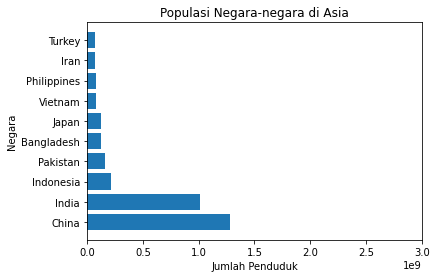

In [82]:
plt.barh(df_country_asia_sort_population_10.index, df_country_asia_sort_population_10['Population'])
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Negara')
plt.title('Populasi Negara-negara di Asia')
plt.xlim(0, 3000000000)
plt.show()

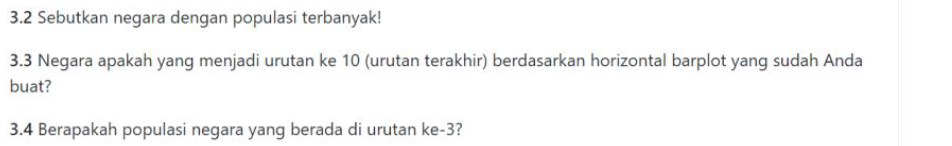

In [25]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "6.PNG", width=1000,unconfined=True)

# Nomer 3.2

In [83]:
# nomer 3.2 

Berdasarkan Barplot terlihat Negara 'China' memiliki populasi terbanyak di Asia

# Nomer 3.3

In [84]:
# nomer 3.3 

Berdasarkan Barplot terlihat Negara 'Turkey' berada pada urutan ke-10 yang memiliki populasi terbanyak di Asia

# Nomer 3.4

In [85]:
# nomer 3.4

Berdasarkan Barplot terlihat Negara 'Indonesia' berada pada urutan ke-3 yang memiliki populasi terbanyak di Asia

In [93]:
pop = df_country_asia_sort_population_10.loc['Indonesia', 'Population']
print(f'Populasi Indonesia: {pop}')

Populasi Indonesia: 212107000


# Nomer 4

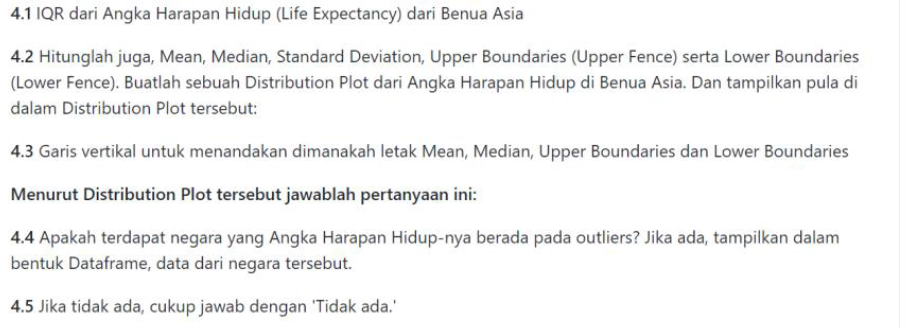

In [26]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "7.PNG", width=1000,unconfined=True)

### Nomer 4.1 , 4.2 

In [136]:
# nomer 4.1 , 4.2

In [151]:
df_country_asia["LifeExpectancy"] = pd.to_numeric(df_country_asia["LifeExpectancy"])
df_country_asia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 234
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            51 non-null     object 
 1   Name            51 non-null     object 
 2   Continent       51 non-null     object 
 3   Region          51 non-null     object 
 4   SurfaceArea     51 non-null     object 
 5   IndepYear       47 non-null     float64
 6   Population      51 non-null     int64  
 7   LifeExpectancy  51 non-null     float64
 8   GNP             51 non-null     object 
 9   GNPOld          45 non-null     object 
 10  LocalName       51 non-null     object 
 11  GovernmentForm  51 non-null     object 
 12  HeadOfState     51 non-null     object 
 13  Capital         51 non-null     float64
 14  Code2           51 non-null     object 
dtypes: float64(3), int64(1), object(11)
memory usage: 6.4+ KB


<ipython-input-151-dc8cb65fc403>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_asia["LifeExpectancy"] = pd.to_numeric(df_country_asia["LifeExpectancy"])


In [152]:
df_country_asia
iqr = df_country_asia['LifeExpectancy'].quantile(0.75) - df_country_asia['LifeExpectancy'].quantile(0.25)
mean = df_country_asia['LifeExpectancy'].mean()
median = df_country_asia['LifeExpectancy'].median()
std = df_country_asia['LifeExpectancy'].std()
upper_whis = df_country_asia['LifeExpectancy'].quantile(0.75) + (1.5*iqr)
lower_whis = df_country_asia['LifeExpectancy'].quantile(0.25) - (1.5*iqr)

print(f'iqr_LifeExpectancy_asia = {iqr}')
print(f'mean_LifeExpectancy_asia  = {mean}')
print(f'median_LifeExpectancy_asia  = {median}')
print(f'std_LifeExpectancy_asia  = {std}')
print(f'upper_whis_LifeExpectancy_asia  = {upper_whis}')
print(f'lower_whis_LifeExpectancy_asia  = {lower_whis}')


iqr_LifeExpectancy_asia = 10.0
mean_LifeExpectancy_asia  = 67.44117647058823
median_LifeExpectancy_asia  = 68.5
std_LifeExpectancy_asia  = 8.39652729336571
upper_whis_LifeExpectancy_asia  = 87.7
lower_whis_LifeExpectancy_asia  = 47.7


### Nomer 4.3

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


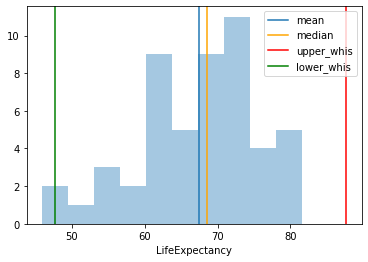

In [153]:
import seaborn as sns

sns.distplot(df_country_asia['LifeExpectancy'], bins=10, kde=False)
plt.axvline(df_country_asia['LifeExpectancy'].mean(), label= 'mean')
plt.axvline(df_country_asia['LifeExpectancy'].median(), color='orange', label='median')
plt.axvline(df_country_asia['LifeExpectancy'].quantile(0.75) + (1.5*iqr), color='red', label='upper_whis')
plt.axvline(df_country_asia['LifeExpectancy'].quantile(0.25) - (1.5*iqr), color='green', label='lower_whis')
plt.legend()

plt.show()

### Nomer 4.4

In [155]:
df_country_asia_outliers = df_country_asia[(df_country_asia['LifeExpectancy'] < lower_whis) | (df_country_asia['LifeExpectancy'] > upper_whis)]
df_country_asia_outliers

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.00,NaN,885000,46.0,0.00,None,Timor Timur,Administrated by the UN,José Alexandre Gusmão,1522.0,TP


### Nomer 4.5

Tidak ada

In [162]:
# Nomer 5
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 28.1+ KB


In [166]:
country_df["GNP"] = pd.to_numeric(country_df["GNP"])
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 28.1+ KB


# Nomer 5

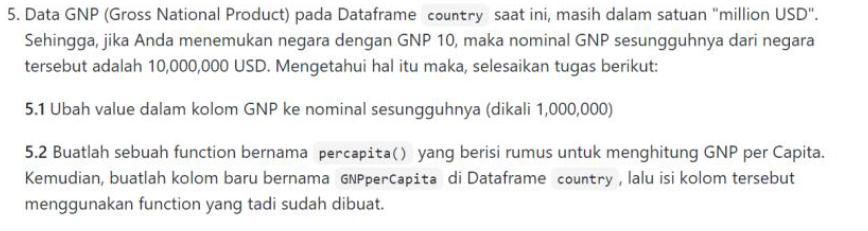

In [27]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "8.PNG", width=1000,unconfined=True)

### Nomer 5.1

In [165]:
# nomer 5.1
def gnpreal(x):
    return x * 1000000

In [168]:
country_df['GNP'] = country_df['GNP'].apply(gnpreal)
country_df

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,8.280000e+08,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5.976000e+09,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6.648000e+09,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,6.320000e+07,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+09,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6.041000e+09,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,1.700000e+10,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,1.167290e+11,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3.377000e+09,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM


# Nomer 5.2

In [170]:
# nomer 5.2

def percapita(x):
    return x['GNP']/x['Capital']

country_df['GNPperCapita'] = country_df.apply(percapita, axis=1)
country_df


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,8.280000e+08,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,6.418605e+06
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5.976000e+09,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,5.976000e+09
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6.648000e+09,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,1.187143e+08
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,6.320000e+07,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,1.019355e+06
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+09,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.426471e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6.041000e+09,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,3.393820e+06
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,1.700000e+10,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU,9.486607e+06
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,1.167290e+11,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA,1.630293e+08
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3.377000e+09,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM,1.067995e+06


In [171]:
# nomer 6
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
 15  GNPperCapita    232 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 30.0+ KB


# Nomer 6

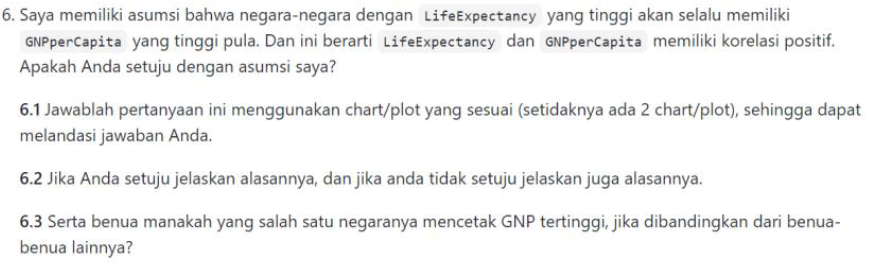

In [28]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "9.PNG", width=1000,unconfined=True)

### Nomer 6.1

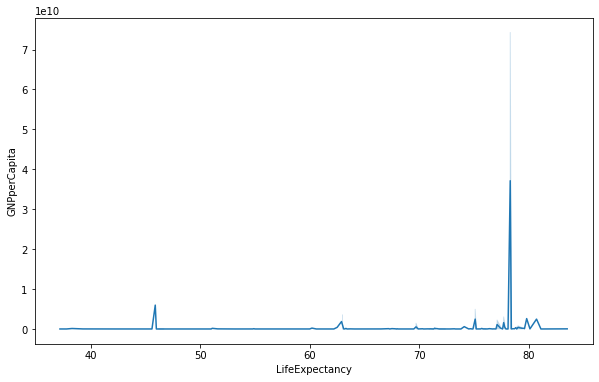

In [172]:
# nomer 6.1
plt.figure(figsize=(10,6))
sns.lineplot(data=country_df, x='LifeExpectancy', y='GNPperCapita')
plt.show()

In [180]:
x = country_df['LifeExpectancy']
y = country_df['GNPperCapita']

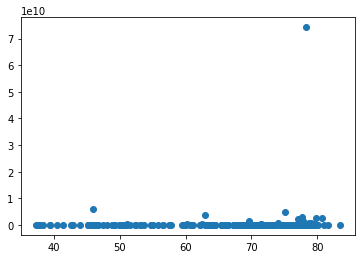

In [181]:
plt.scatter(x, y) 
plt.show()

### Nomer 6.2

In [182]:
# nomer 6.2

Saya tidak setuju, berdasarkan Kedua grafik di atas terlihat tidak adanya 'Trend Positif' sehinggan tidak ada 'Korelasi positif'.

### Nomer 6.3 

In [191]:
# nomer 6.3
df_country_max_gnp = country_df[country_df['GNP']==country_df['GNP'].max()]
df_country_max_gnp

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
223,USA,United States,North America,North America,9363520.00,1776.0,278357000,77.1,8.510700e+12,8110900.00,United States,Federal Republic,George W. Bush,3813.0,US,2.232022e+09


Ternyata Negara yang memiliki GNP paling besar adalah Negara 'US' yang berada di Benua "Nort America"

# Nomer 7

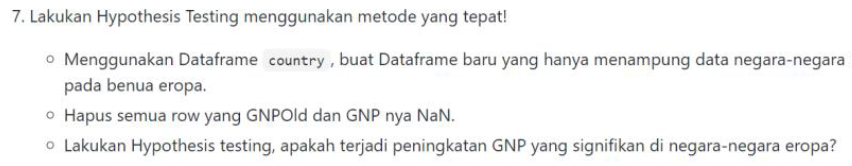

In [31]:
PATH = "C:/Users/ASUS/Pictures/"
Image(filename = PATH + "10.PNG", width=1000,unconfined=True)

In [29]:
# Nomer 7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random


In [30]:
df_country_europe = country_df[country_df['Continent']=='Europe']
df_country_europe

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
5,AND,Andorra,Europe,Southern Europe,468.00,1278.0,78000,83.5,1630.00,None,Andorra,Parliamentary Coprincipality,,55.0,AD
15,AUT,Austria,Europe,Western Europe,83859.00,1918.0,8091800,77.7,211860.00,206025.00,Österreich,Federal Republic,Thomas Klestil,1523.0,AT
18,BEL,Belgium,Europe,Western Europe,30518.00,1830.0,10239000,77.8,249704.00,243948.00,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE
22,BGR,Bulgaria,Europe,Eastern Europe,110994.00,1908.0,8190900,70.9,12178.00,10169.00,Balgarija,Republic,Petar Stojanov,539.0,BG
25,BIH,Bosnia and Herzegovina,Europe,Southern Europe,51197.00,1992.0,3972000,71.5,2841.00,None,Bosna i Hercegovina,Federal Republic,Ante Jelavic,201.0,BA
26,BLR,Belarus,Europe,Eastern Europe,207600.00,1991.0,10236000,68.0,13714.00,None,Belarus,Republic,Aljaksandr Lukašenka,3520.0,BY
39,CHE,Switzerland,Europe,Western Europe,41284.00,1499.0,7160400,79.6,264478.00,256092.00,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH
55,CZE,Czech Republic,Europe,Eastern Europe,78866.00,1993.0,10278100,74.5,55017.00,52037.00,¸esko,Republic,Václav Havel,3339.0,CZ
56,DEU,Germany,Europe,Western Europe,357022.00,1955.0,82164700,77.4,2133367.00,2102826.00,Deutschland,Federal Republic,Johannes Rau,3068.0,DE


In [317]:
europe = df_country_europe.dropna()

In [318]:
europe

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+09,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.426471e+07
15,AUT,Austria,Europe,Western Europe,83859.00,1918.0,8091800,77.7,2.118600e+11,206025.00,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,1.391070e+08
18,BEL,Belgium,Europe,Western Europe,30518.00,1830.0,10239000,77.8,2.497040e+11,243948.00,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,1.394994e+09
22,BGR,Bulgaria,Europe,Eastern Europe,110994.00,1908.0,8190900,70.9,1.217800e+10,10169.00,Balgarija,Republic,Petar Stojanov,539.0,BG,2.259369e+07
39,CHE,Switzerland,Europe,Western Europe,41284.00,1499.0,7160400,79.6,2.644780e+11,256092.00,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH,8.142796e+07
55,CZE,Czech Republic,Europe,Eastern Europe,78866.00,1993.0,10278100,74.5,5.501700e+10,52037.00,¸esko,Republic,Václav Havel,3339.0,CZ,1.647709e+07
56,DEU,Germany,Europe,Western Europe,357022.00,1955.0,82164700,77.4,2.133367e+12,2102826.00,Deutschland,Federal Republic,Johannes Rau,3068.0,DE,6.953608e+08
59,DNK,Denmark,Europe,Nordic Countries,43094.00,800.0,5330000,76.5,1.740990e+11,169264.00,Danmark,Constitutional Monarchy,Margrethe II,3315.0,DK,5.251855e+07
66,ESP,Spain,Europe,Southern Europe,505992.00,1492.0,39441700,78.8,5.532330e+11,532031.00,España,Constitutional Monarchy,Juan Carlos I,653.0,ES,8.472175e+08
67,EST,Estonia,Europe,Baltic Countries,45227.00,1991.0,1439200,69.5,5.328000e+09,3371.00,Eesti,Republic,Lennart Meri,3791.0,EE,1.405434e+06


In [319]:
europe["GNPOld"] = pd.to_numeric(europe["GNPOld"])
europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 4 to 220
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            36 non-null     object 
 1   Name            36 non-null     object 
 2   Continent       36 non-null     object 
 3   Region          36 non-null     object 
 4   SurfaceArea     36 non-null     object 
 5   IndepYear       36 non-null     float64
 6   Population      36 non-null     int64  
 7   LifeExpectancy  36 non-null     object 
 8   GNP             36 non-null     float64
 9   GNPOld          36 non-null     float64
 10  LocalName       36 non-null     object 
 11  GovernmentForm  36 non-null     object 
 12  HeadOfState     36 non-null     object 
 13  Capital         36 non-null     float64
 14  Code2           36 non-null     object 
 15  GNPperCapita    36 non-null     float64
dtypes: float64(5), int64(1), object(10)
memory usage: 4.8+ KB


<ipython-input-319-cf83324c3719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe["GNPOld"] = pd.to_numeric(europe["GNPOld"])


In [320]:
def gnpreal(x):
    return x * 1000000

In [321]:
europe['GNPOld'] = europe['GNPOld'].apply(gnpreal)
europe

<ipython-input-321-751a79cc282c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe['GNPOld'] = europe['GNPOld'].apply(gnpreal)


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+09,2.500000e+09,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,9.426471e+07
15,AUT,Austria,Europe,Western Europe,83859.00,1918.0,8091800,77.7,2.118600e+11,2.060250e+11,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,1.391070e+08
18,BEL,Belgium,Europe,Western Europe,30518.00,1830.0,10239000,77.8,2.497040e+11,2.439480e+11,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,1.394994e+09
22,BGR,Bulgaria,Europe,Eastern Europe,110994.00,1908.0,8190900,70.9,1.217800e+10,1.016900e+10,Balgarija,Republic,Petar Stojanov,539.0,BG,2.259369e+07
39,CHE,Switzerland,Europe,Western Europe,41284.00,1499.0,7160400,79.6,2.644780e+11,2.560920e+11,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH,8.142796e+07
55,CZE,Czech Republic,Europe,Eastern Europe,78866.00,1993.0,10278100,74.5,5.501700e+10,5.203700e+10,¸esko,Republic,Václav Havel,3339.0,CZ,1.647709e+07
56,DEU,Germany,Europe,Western Europe,357022.00,1955.0,82164700,77.4,2.133367e+12,2.102826e+12,Deutschland,Federal Republic,Johannes Rau,3068.0,DE,6.953608e+08
59,DNK,Denmark,Europe,Nordic Countries,43094.00,800.0,5330000,76.5,1.740990e+11,1.692640e+11,Danmark,Constitutional Monarchy,Margrethe II,3315.0,DK,5.251855e+07
66,ESP,Spain,Europe,Southern Europe,505992.00,1492.0,39441700,78.8,5.532330e+11,5.320310e+11,España,Constitutional Monarchy,Juan Carlos I,653.0,ES,8.472175e+08
67,EST,Estonia,Europe,Baltic Countries,45227.00,1991.0,1439200,69.5,5.328000e+09,3.371000e+09,Eesti,Republic,Lennart Meri,3791.0,EE,1.405434e+06


In [322]:
y_A = europe['GNPOld']
y_B = europe['GNP']

In [323]:
df_old = pd.DataFrame({'GNP': 'GNPold', 'nilai': y_A})
df_new = pd.DataFrame({'GNP': 'GNP', 'nilai': y_B})

df = df_old.append(df_new)
df

,GNP,nilai
4,GNPold,2.500000e+09
15,GNPold,2.060250e+11
18,GNPold,2.439480e+11
22,GNPold,1.016900e+10
39,GNPold,2.560920e+11
...,...,...
181,GNP,2.766080e+11
198,GNP,2.059400e+10
199,GNP,1.975600e+10
200,GNP,2.264920e+11


In [324]:
df = df.reset_index()

In [325]:
df = df.drop(['index'], axis=1)

In [326]:
df

,GNP,nilai
0,GNPold,2.500000e+09
1,GNPold,2.060250e+11
2,GNPold,2.439480e+11
3,GNPold,1.016900e+10
4,GNPold,2.560920e+11
...,...,...
67,GNP,2.766080e+11
68,GNP,2.059400e+10
69,GNP,1.975600e+10
70,GNP,2.264920e+11


#### Hypotesis test


H0 : mu_new = mu_old
<br>
H1 : mu_new > mu_old

In [327]:
alpha = 0.05
# t_crit = 1.984 # ini lihat dari table T-Distribution

tstat, pvalue = list(stats.stats.ttest_ind(
    df[df['GNP'] == 'GNPold']['nilai'],
    df[df['GNP'] == 'GNP']['nilai'],
    equal_var = True
)) # urutan berpengaruh
print('alpha:', alpha)
print('pvalue:', pvalue/2)


alpha: 0.05
pvalue: 0.4921700066092519


The P-value is upper than our significant level 0.05, it means we have  no enough evidence to reject the Null Hypothesis.

Kesimpulannya tidak adanya Peningkatan "GNP" yang signifikan di negara-negara eropa.